In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## About data

1. **RowNumber** : Corresponds to the record (row) number and has no effect on the output.

2. **CustomerId** : Contains random values and has no effect on customer leaving the bank.

3. **Surname** : The surname of a customer has no impact on their decision to leave the bank.

4. **CreditScore** : Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. **Geography** : A customer’s location can affect their decision to leave the bank.

6. **Gender** : It’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. **Age** : This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. **Tenure** : Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. **Balance** : Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. **NumOfProducts** : Refers to the number of products that a customer has purchased through the bank.

11. **HasCrCard** : Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. **IsActiveMember** : Active customers are less likely to leave the bank.

13. **EstimatedSalary** : As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. **Exited** : Whether or not the customer left the bank.

15. **Complain** : Whether the customer has a complaint or not.

16. **Satisfaction Score** : Score provided by the customer for their complaint resolution.

17. **Card Type** : Type of card held by the customer.

18. **Points Earned** : The points earned by the customer for using a credit card.


In [3]:
df.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [4]:
df.shape

(10000, 15)

In [5]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Overview of Categorical Variables

We create bar charts to get an overview of the categorical variables we have, and in this way, identify any erroneous information in our data.


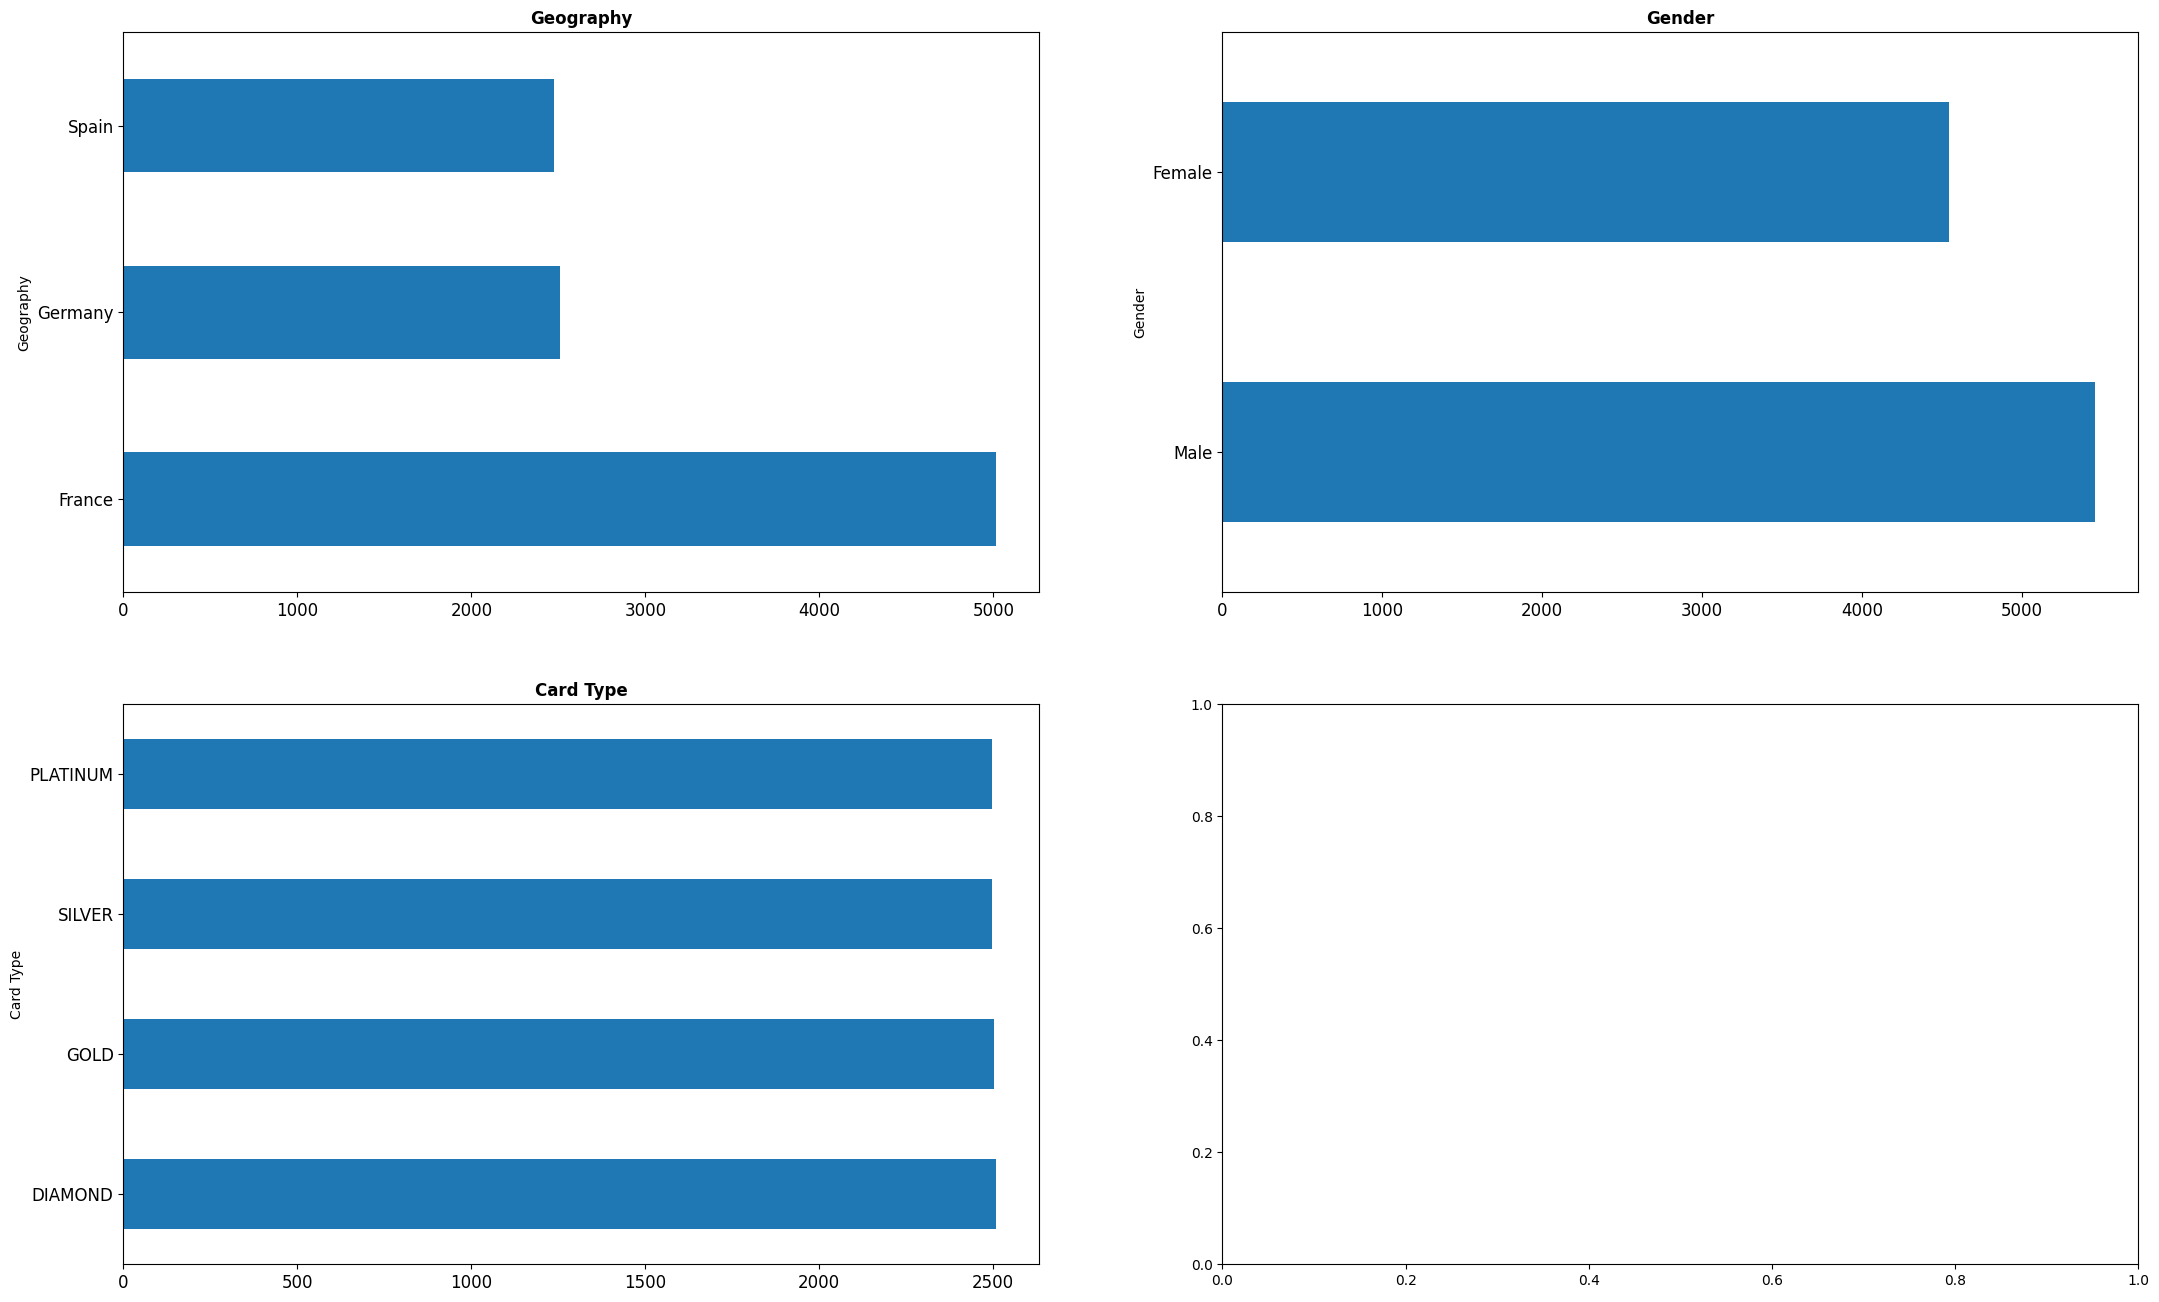

In [7]:
def eda_categorical_charts(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (26, rows * 8))

    # Flatten the axes array to iterate over it as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds charts
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)
        
eda_categorical_charts(df.select_dtypes('O'))


### Overview of Numerical Variables

We create box plots to examine the distribution of numerical variables, which will also allow us to identify outliers in the information we have.


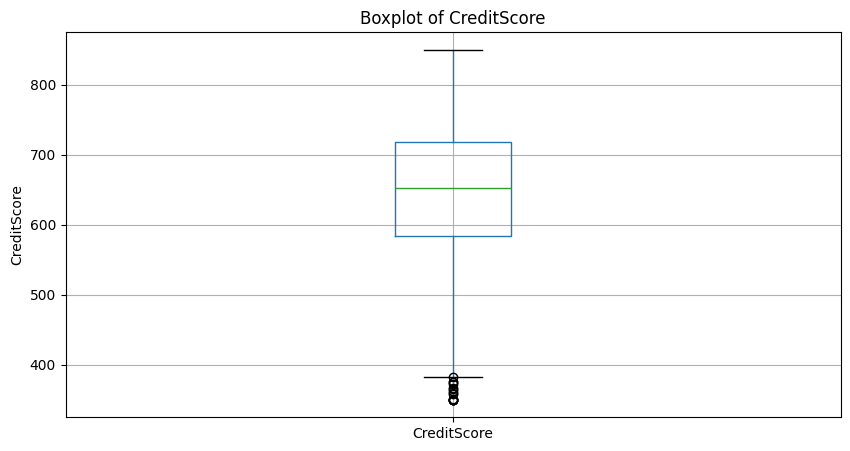

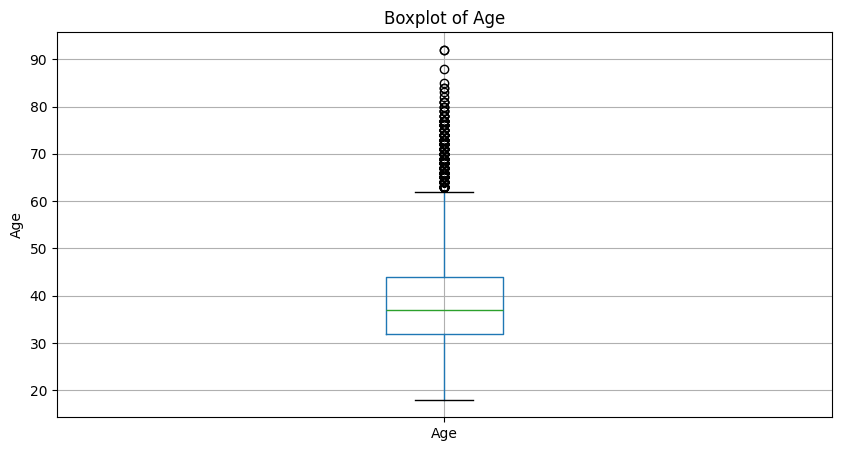

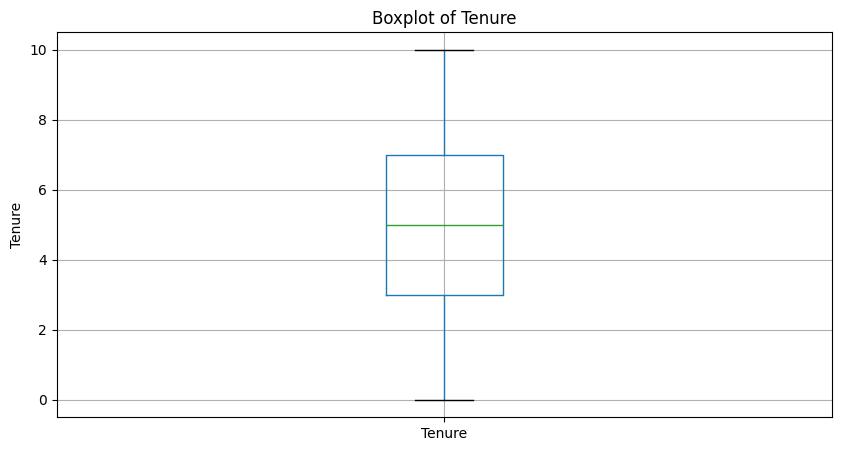

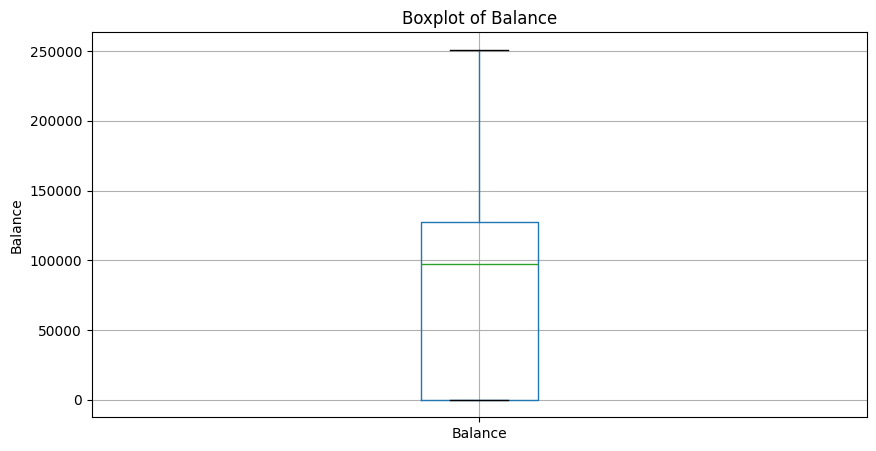

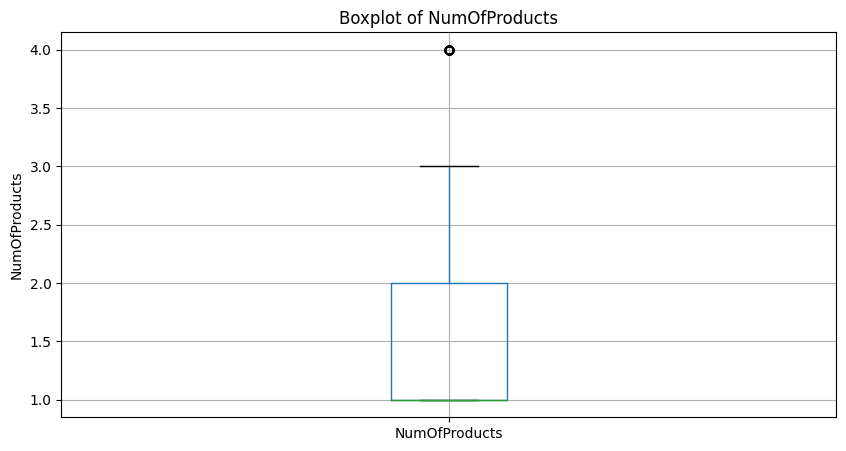

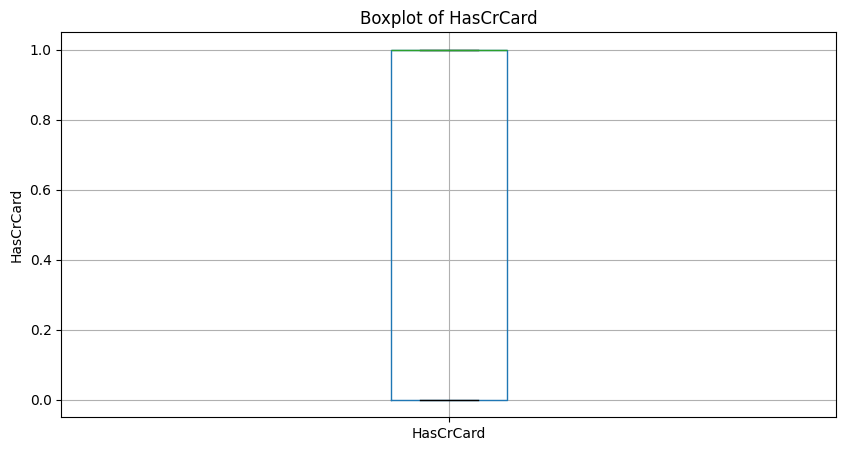

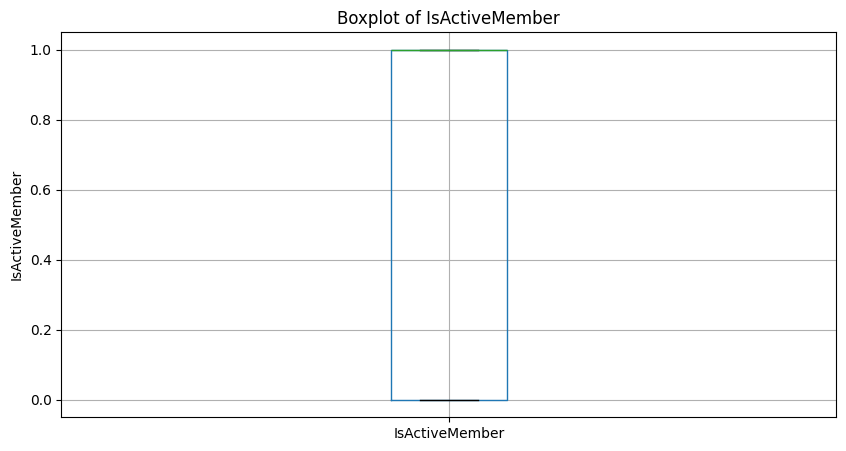

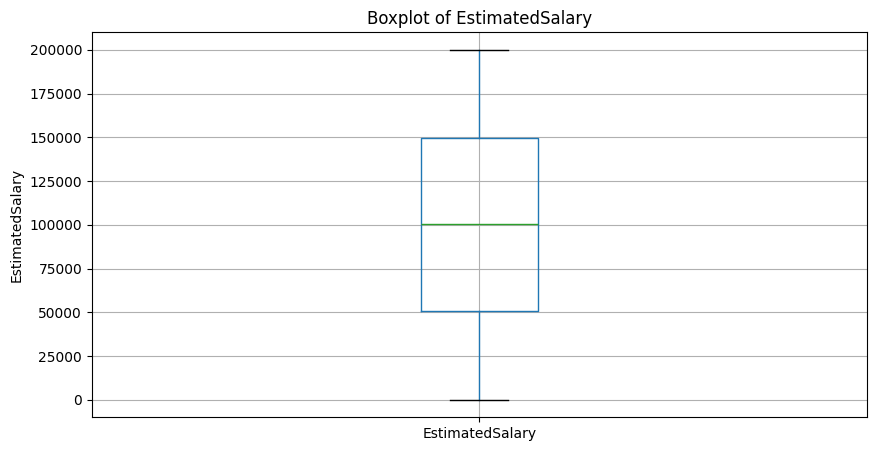

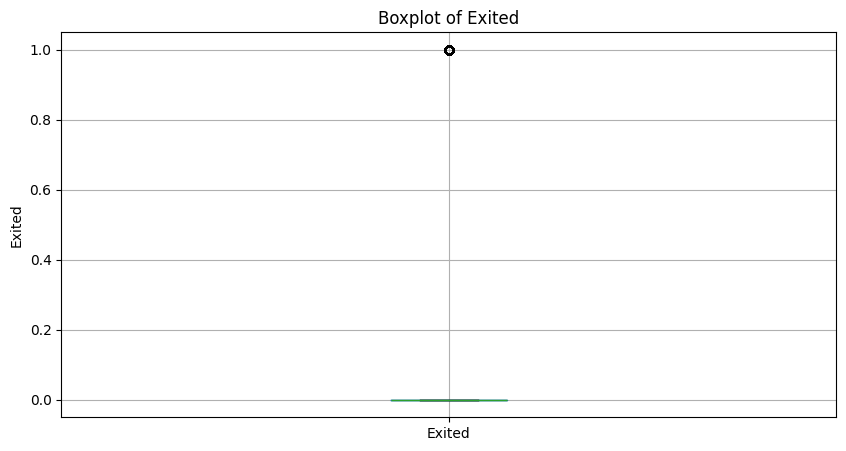

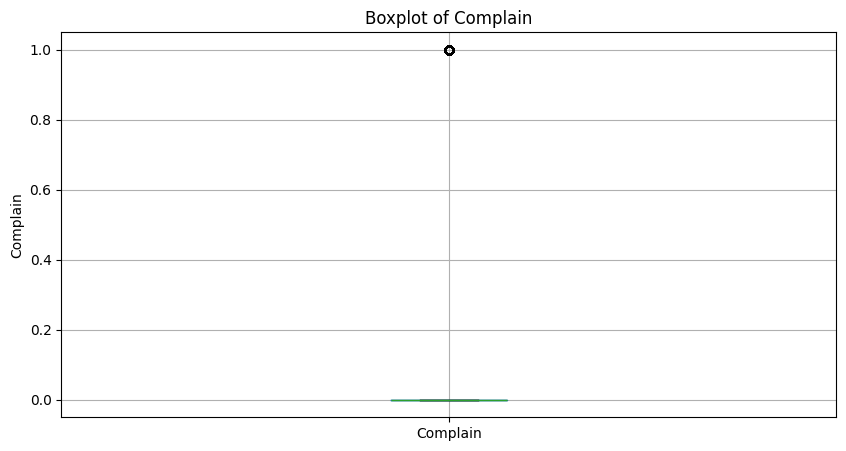

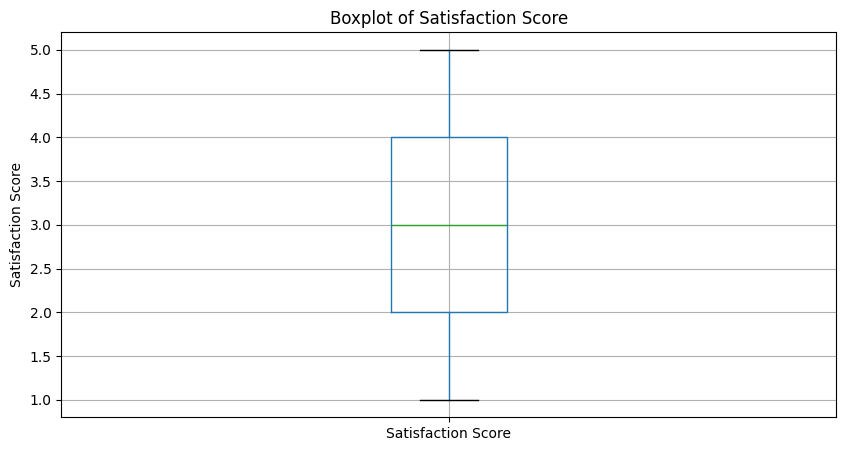

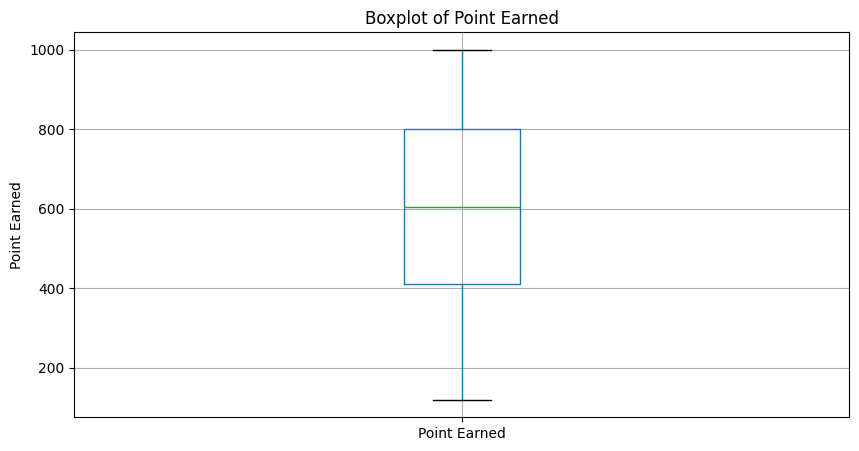

In [8]:
def boxplot_charts(df):
    
    # Select only numeric columns
    df_numeric = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for column in df_numeric.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()
        

boxplot_charts(df)


In [9]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Complain,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


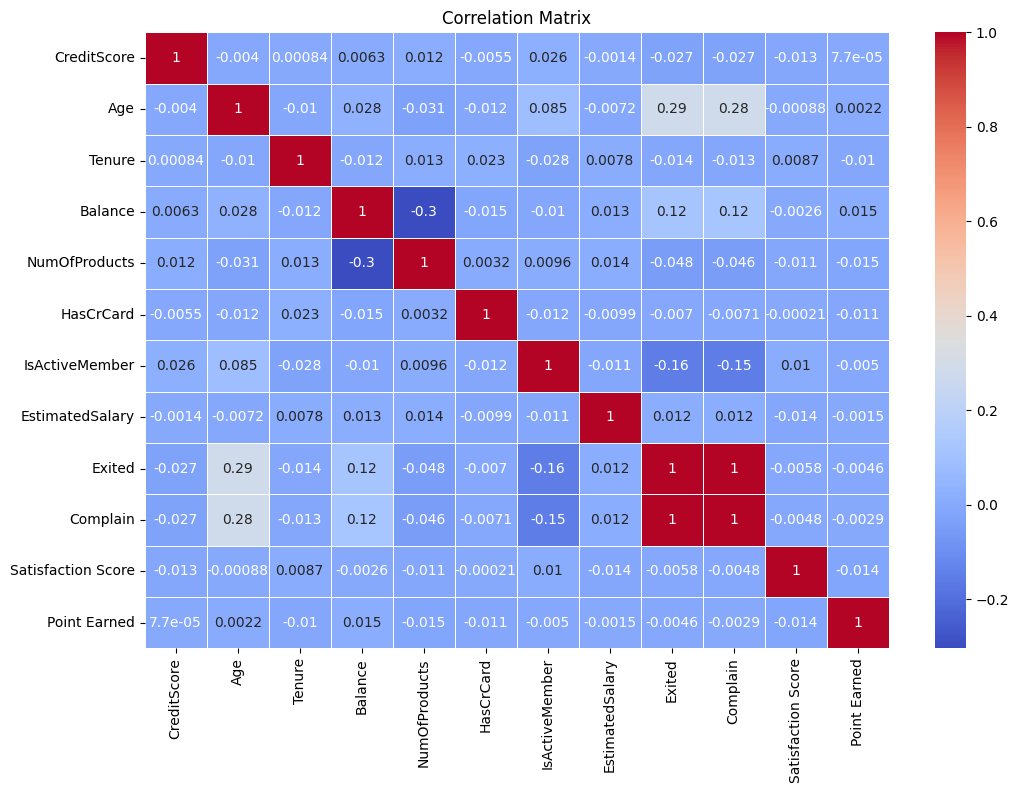

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

**For Exited and Complain**: Addressing customer complaints is essential to improve retention, as dissatisfied customers are more prone to leaving.

**For Balance and NumOfProducts**: These factors seem to operate independently, suggesting that customer engagement strategies may need to be tailored based on whether the focus is on increasing product adoption or managing account balances.


<Axes: >

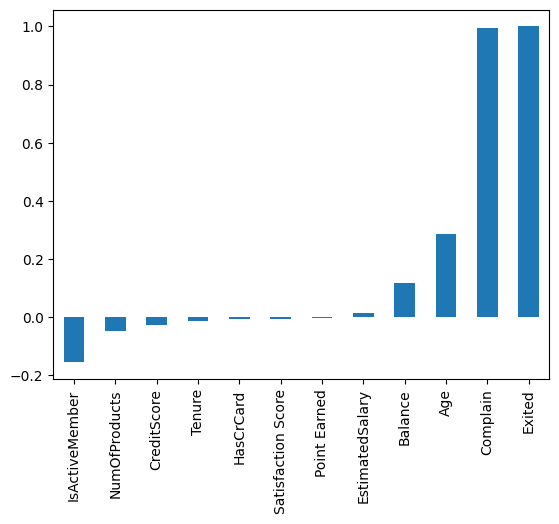

In [11]:
correlation_matrix['Exited'].sort_values().plot(kind='bar')

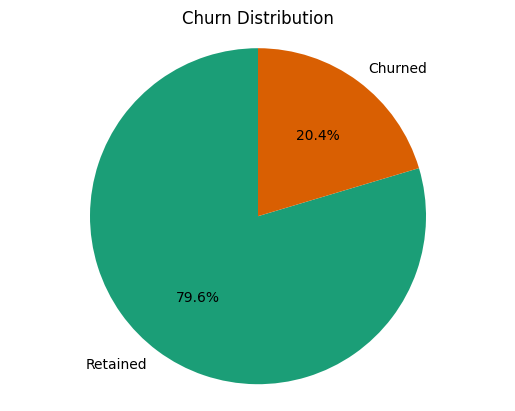

In [12]:
labels = ['Retained', 'Churned']
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

**Results**:
- The pie chart shows the distribution between Retained and Churned customers.

- The percentages indicate that approximately 20.4% of customers have churned, while 79.6% have been retained.

**Conclusions**:
- The majority of customers have been retained, which is positive for the business.

- However, with 20.4% of customers churning, there is significant room for improvement in retention strategies. Further analysis on the causes of churn and targeted interventions could help reduce this rate.

This visual analysis provides a quick overview of customer retention status.

### Conversion of 0 and 1 Data to Categorical Variables

We convert the variables from 0 and 1 to Yes or No variables to visualize the information in an easier way.


In [13]:
df['Complain'] = df['Complain'].map({0: 'No', 1: 'Yes'})
df['IsActiveMember'] = df['IsActiveMember'].map({0: 'No', 1: 'Yes'})
df['HasCrCard'] = df['HasCrCard'].map({0: 'No', 1: 'Yes'})
df['Exited'] = df['Exited'].map({0: 'No', 1: 'Yes'})

### We re-explore the categorical variables to get an overview of the data


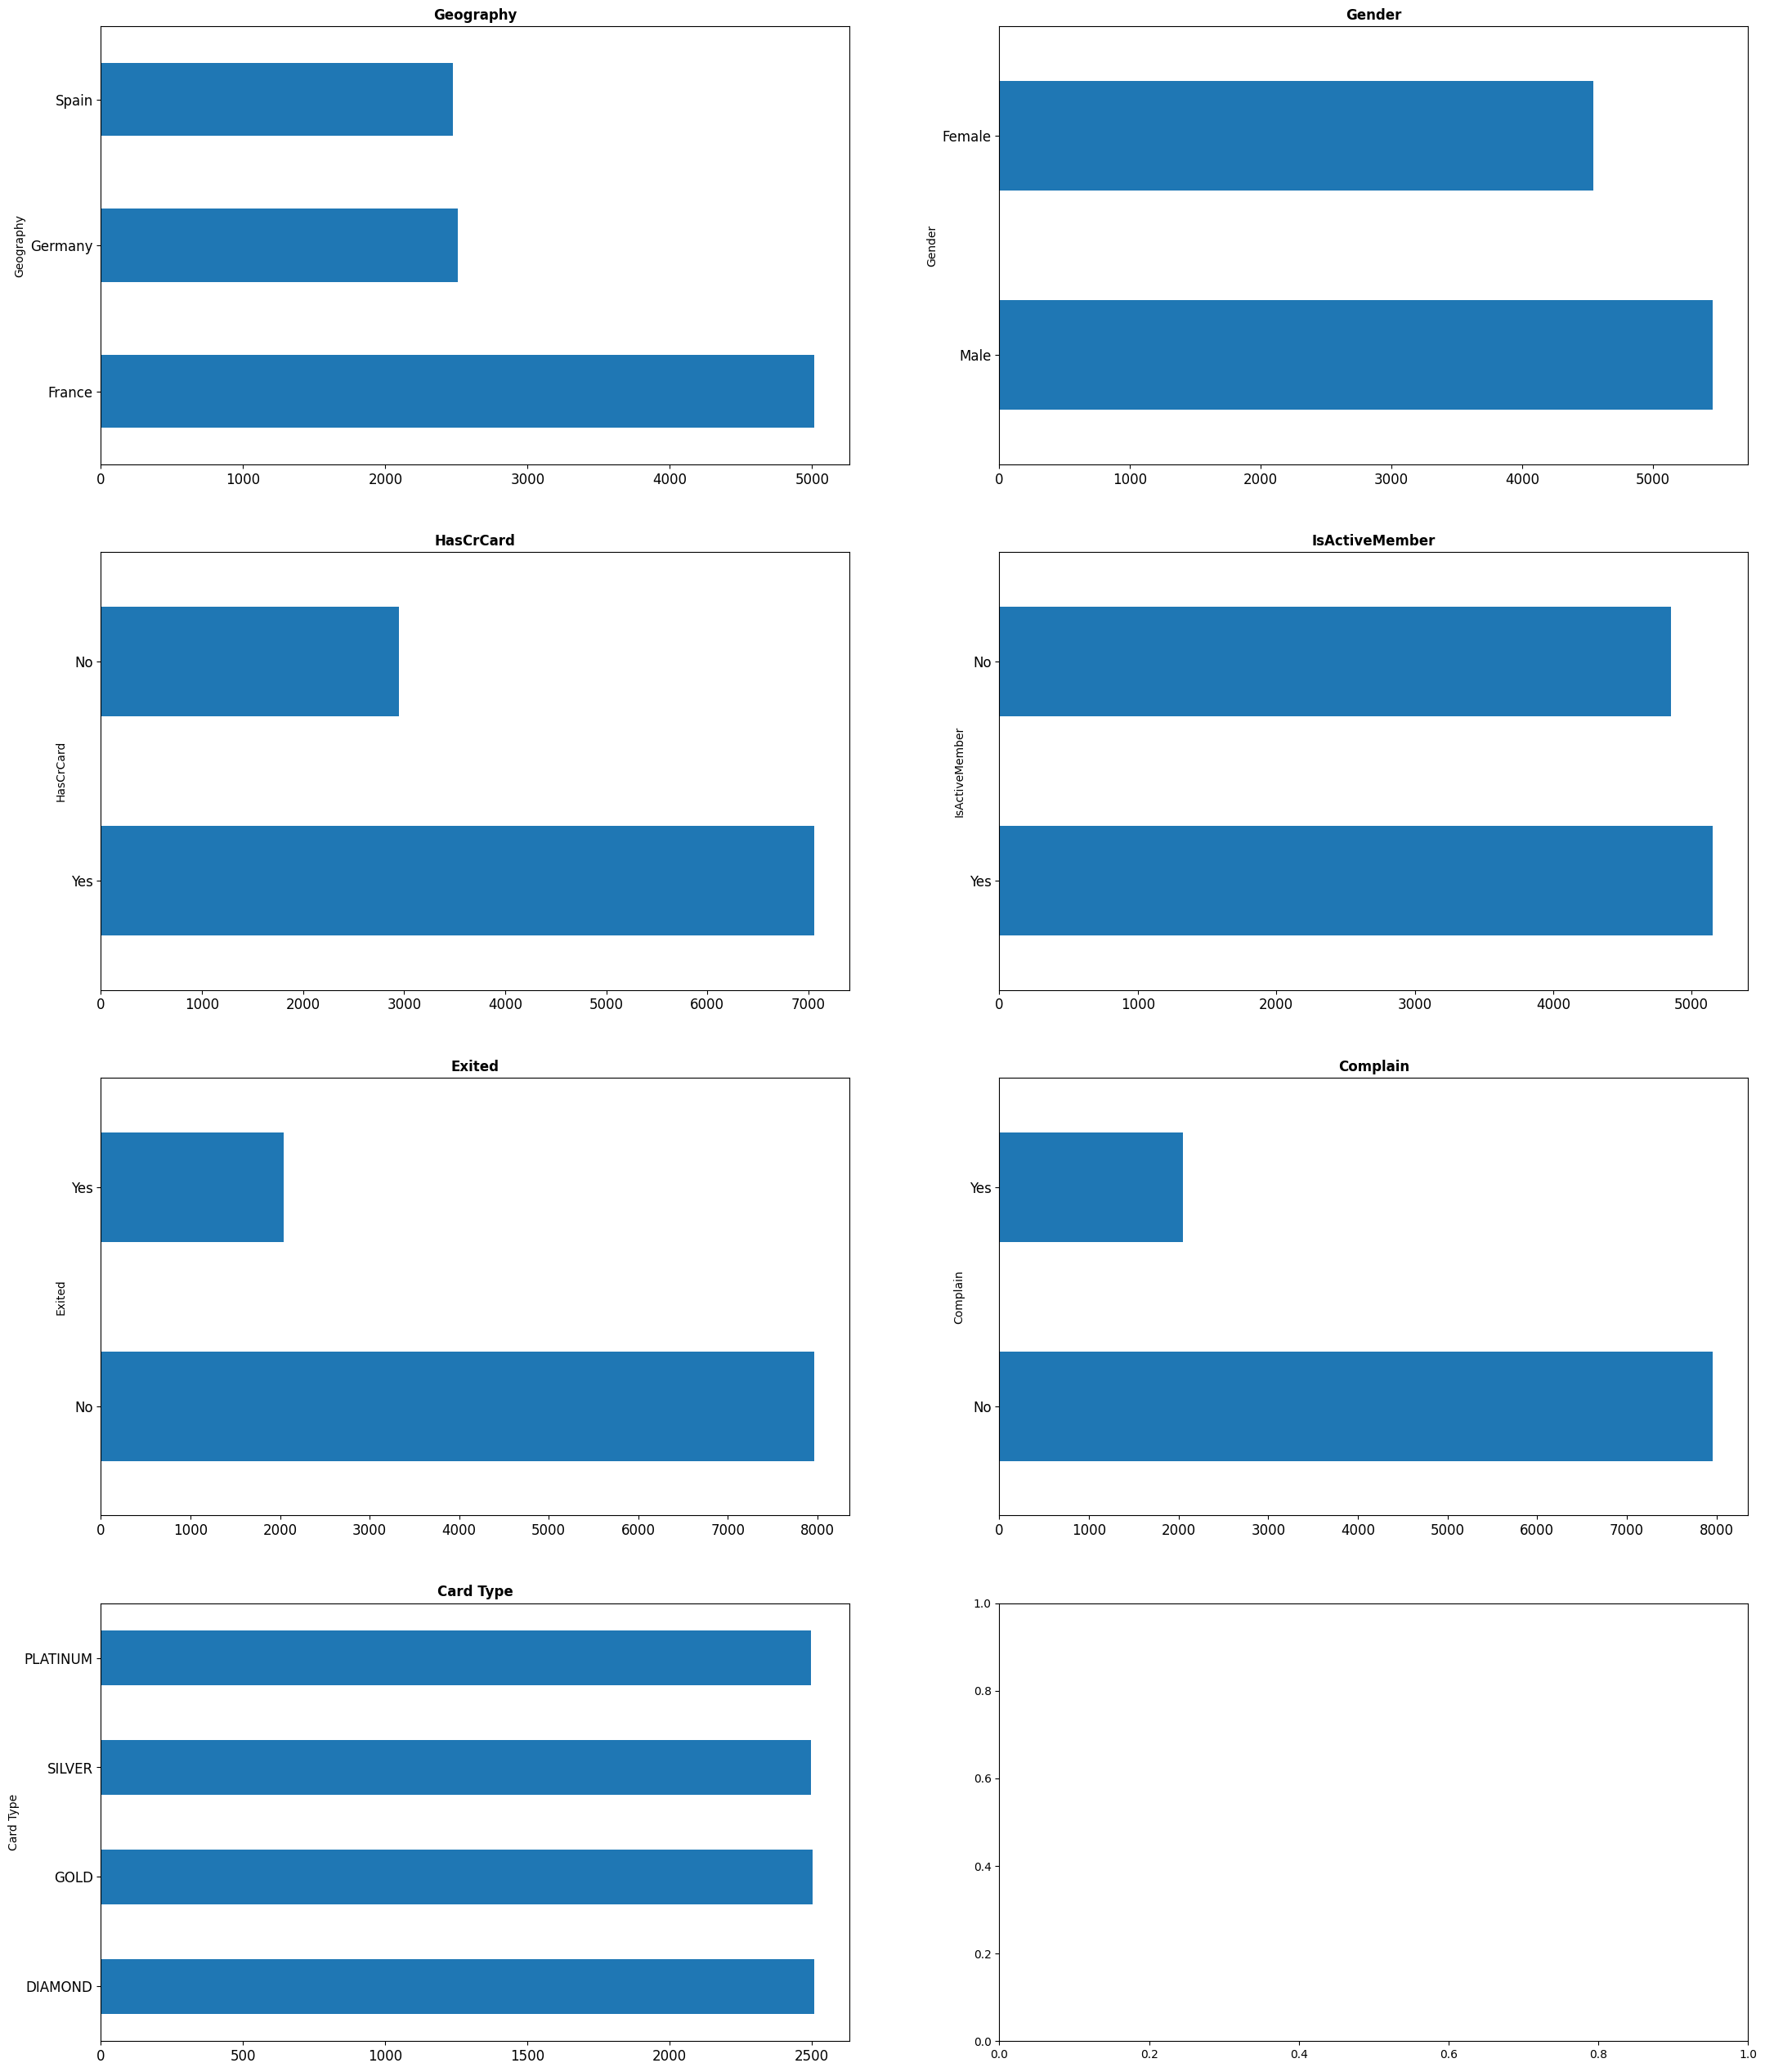

In [14]:
def eda_categorical_charts(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (26, rows * 8))

    # Flatten the axes array to iterate over it as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds charts
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)
        
eda_categorical_charts(df.select_dtypes('O'))

## Customer Segmentation by Tenure


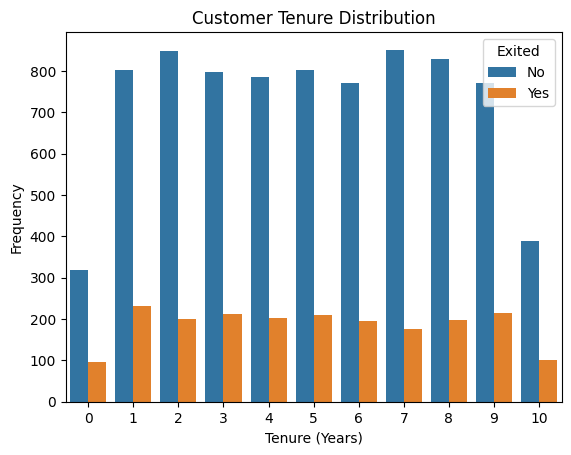

In [15]:
sns.countplot(x='Tenure', data=df, hue='Exited')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


**Results**:
- The count plot illustrates the distribution of customer tenure across different years, with a distinction between those who have churned (Yes) and those who have been retained (No).

- The plot shows that customers with lower tenure (1-3 years) have a higher churn rate compared to those with longer tenure.

**Conclusions**:
- Customers with shorter tenure are more likely to churn, suggesting that early-stage customer retention strategies could be crucial.

- The retention rate improves as customers stay longer, indicating that once customers surpass the initial few years, they are more likely to remain loyal.


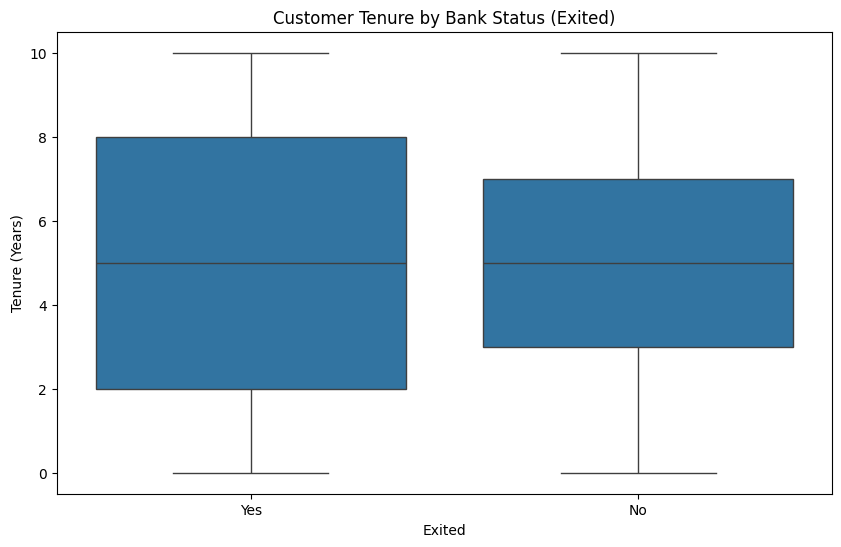

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Customer Tenure by Bank Status (Exited)')
plt.xlabel('Exited')
plt.ylabel('Tenure (Years)')
plt.show()


**Results**:
- The boxplot shows the distribution of customer tenure for those who have churned (Yes) versus those who have been retained (No).

- Customers who churned tend to have a shorter tenure, with a median tenure lower than that of retained customers.

- There is more variation in tenure among retained customers, with some having very long tenures.

**Conclusions**:
- The shorter tenure among churned customers reinforces the idea that early retention is crucial.

- The broader range of tenures among retained customers suggests that once customers are retained beyond the initial period, they may stay for many years, indicating strong loyalty.


C:\Users\juana\AppData\Local\Temp\ipykernel_16832\1400866300.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variable = df.groupby('Tenure_Segment')['Exited'].value_counts().unstack().reset_index()


Exited Tenure_Segment    No  Yes
0           0-2 years  1968  528
1           2-5 years  2385  625
2           5-7 years  1622  373
3          7-10 years  1987  512


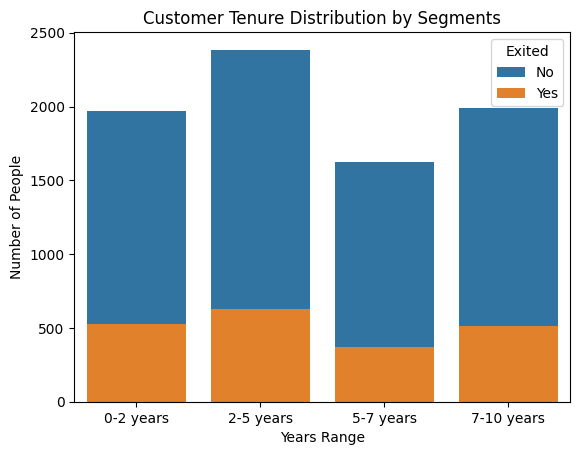

In [17]:
df['Tenure_Segment'] = pd.cut(df['Tenure'], bins=[-0.1, 2, 5, 7, 10], labels=['0-2 years', '2-5 years', '5-7 years', '7-10 years'])

variable = df.groupby('Tenure_Segment')['Exited'].value_counts().unstack().reset_index()

print(variable)

sns.barplot(x='Tenure_Segment', y='No', data=variable, label='No')
sns.barplot(x='Tenure_Segment', y='Yes', data=variable, label='Yes')
plt.title('Customer Tenure Distribution by Segments')
plt.ylabel('Number of People')
plt.xlabel('Years Range')
plt.legend(title='Exited')
plt.show()


**Results**:
- The bar plot illustrates the distribution of customer tenure segmented into four categories: `0-2 years`, `2-5 years`, `5-7 years`, and `7-10 years`.

- The plot shows that the majority of customers fall within the `2-5 years` and `7-10 years` segments.

- The `0-2 years` segment has a higher proportion of churned customers compared to the other segments.

**Conclusions**:
- Customers in the `0-2 years` segment are more likely to churn, which suggests that this is a critical period for customer retention efforts.

- The `7-10 years` segment shows a strong retention rate, indicating that once customers pass the early stages, they tend to stay longer.


## Impact of Credit Score on Churn


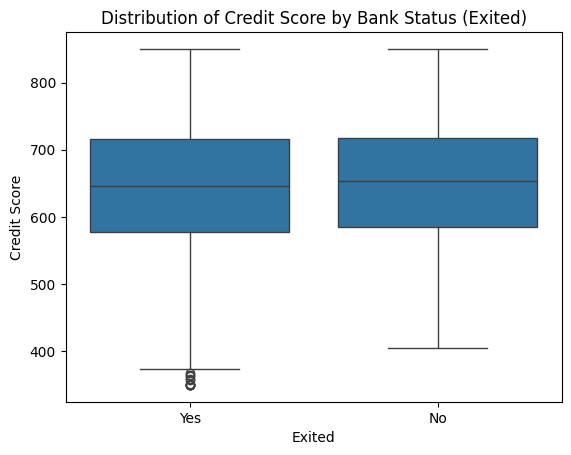

In [18]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Distribution of Credit Score by Bank Status (Exited)')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()


**Results**:
- The boxplot illustrates the distribution of credit scores for customers who have churned (Yes) versus those who have been retained (No).

- Both groups have a similar range of credit scores, but churned customers (Yes) show a slightly lower median credit score compared to retained customers.

**Conclusions**:
- The slight difference in credit scores suggests that customers with lower credit scores may be slightly more prone to churn, though the difference is not very pronounced.

- While credit score might be a factor in churn, it likely isn't the sole determinant, and further analysis should consider other variables in combination with credit score.


C:\Users\juana\AppData\Local\Temp\ipykernel_16832\644185970.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_creditscore = df.groupby(df.Credit_Segment).Exited.value_counts().unstack().reset_index()


Exited Credit_Segment    No  Yes  Churn_Rate
0               0-600  2401  665        22.0
1             600-700  3065  753        20.0
2             700-800  1978  493        20.0
3             800-900   518  127        20.0
4            900-1000     0    0         NaN


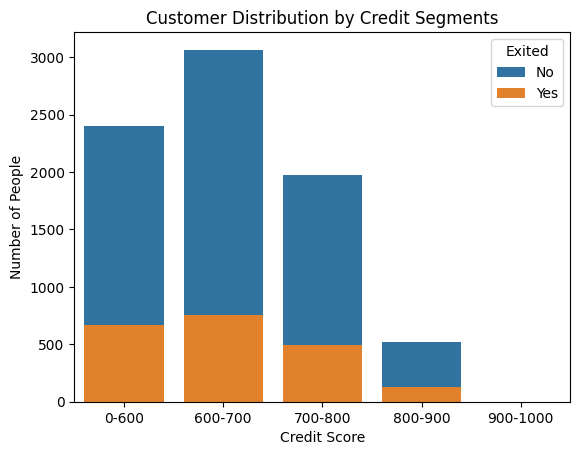

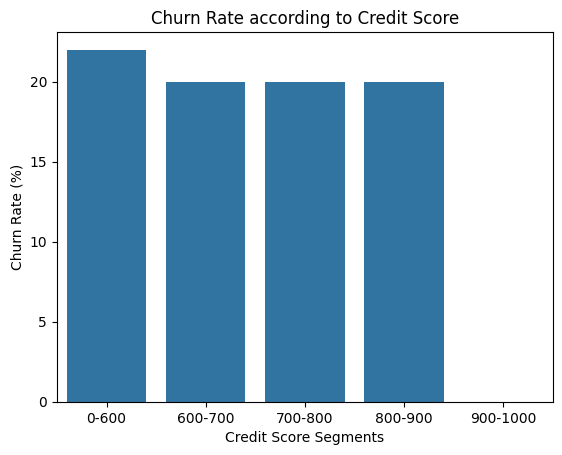

In [19]:
df['Credit_Segment'] = pd.cut(df['CreditScore'], bins=[0, 600, 700, 800, 900, 1000], labels=['0-600', '600-700', '700-800', '800-900', '900-1000'])

abandono_creditscore = df.groupby(df.Credit_Segment).Exited.value_counts().unstack().reset_index()

abandono_creditscore['Churn_Rate'] = ((abandono_creditscore.Yes / (abandono_creditscore.No + abandono_creditscore.Yes)) * 100).round()

print(abandono_creditscore)

sns.barplot(x='Credit_Segment', y='No', data=abandono_creditscore, label='No')
sns.barplot(x='Credit_Segment', y='Yes', data=abandono_creditscore, label='Yes')
plt.title('Customer Distribution by Credit Segments')
plt.ylabel('Number of People')
plt.xlabel('Credit Score')
plt.legend(title='Exited')
plt.show()

sns.barplot(x='Credit_Segment', y='Churn_Rate', data=abandono_creditscore)
plt.title('Churn Rate according to Credit Score')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Credit Score Segments')
plt.show()



**Results**:
- The first bar plot shows the distribution of customers across different credit score segments (`0-600`, `600-700`, `700-800`, and `800-900`). 
  - The majority of customers fall within the `600-700` segment, followed by the `0-600` segment.
  - The `0-600` segment has the highest number of customers who churned (`665`), followed by the `600-700` segment.

- The second bar plot illustrates the churn rate for each credit score segment.
  - The churn rate is highest for the `0-600` segment at `22%`, while other segments have a consistent churn rate of around `20%`.
  


**Conclusions**:
- Customers with a credit score in the `0-600` range are more likely to churn compared to those in higher credit score segments. This indicates that credit score may be a factor in customer retention, especially for those with lower scores.

- The relatively consistent churn rates across the other segments suggest that while credit score is a factor, it is not the only determinant of customer churn.




### Relationship Between Account Balance and Churn


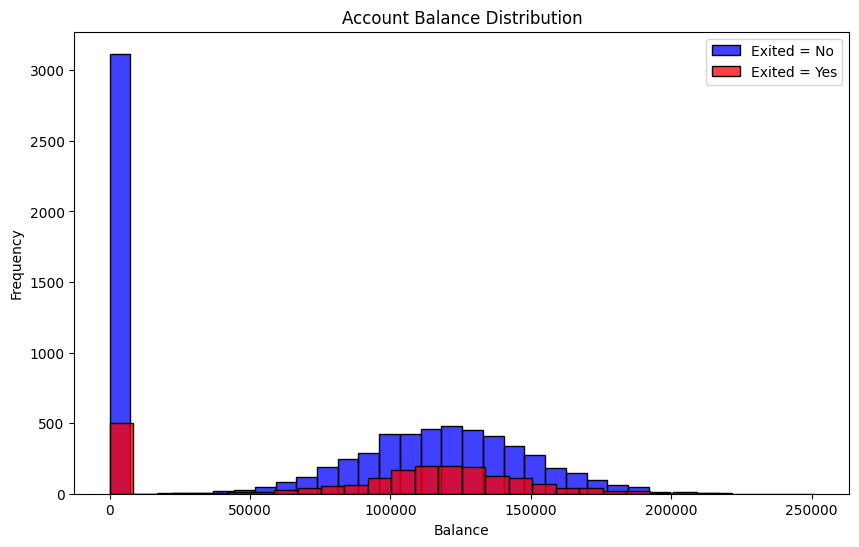

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Exited'] == 'No']['Balance'], kde=False, color='blue', label='Exited = No', bins=30)
sns.histplot(df[df['Exited'] == 'Yes']['Balance'], kde=False, color='red', label='Exited = Yes', bins=30)

plt.title('Account Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Results**:

- Retained customers (Exited = No) have a more even distribution of balances, with a significant number having zero balance.

- Churned customers (Exited = Yes) show a higher concentration in the mid-to-high balance ranges, with fewer having zero balance.

**Conclusions**:
- Customers with zero balance are more likely to be retained, which could suggest that those who keep an account open without using it are less likely to churn.

- On the other hand, customers with higher balances might be at greater risk of churning, possibly due to seeking better financial management or service elsewhere.

- Understanding the balance distribution can help target interventions to retain high-balance customers who might be at risk of leaving.


In [21]:
df[df['Balance'] > 225000].Balance.value_counts()

Balance
250898.09    1
238387.56    1
Name: count, dtype: int64

In [22]:
df[df['Balance'] < 30000].Balance.value_counts()

Balance
0.00        3617
14262.80       1
27755.97       1
28082.95       1
24043.45       1
29602.08       1
16893.59       1
12459.19       1
23503.31       1
27517.15       1
28649.64       1
3768.69        1
27288.43       1
Name: count, dtype: int64

C:\Users\juana\AppData\Local\Temp\ipykernel_16832\251227860.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_abandonment = df.groupby('Balance_Segment')['Exited'].value_counts().unstack().reset_index()


Exited Balance_Segment    No  Yes  Churn_Rate
0                0-25k  3119  504        14.0
1              25k-50k    47   22        32.0
2              50k-75k   274   75        21.0
3             75k-100k   934  226        19.0
4            100k-125k  1510  558        27.0
5            125k-150k  1333  429        24.0
6            150k-175k   582  156        21.0
7            175k-200k   148   49        25.0
8            200k-225k    15   17        53.0
9            225k-250k     0    1       100.0


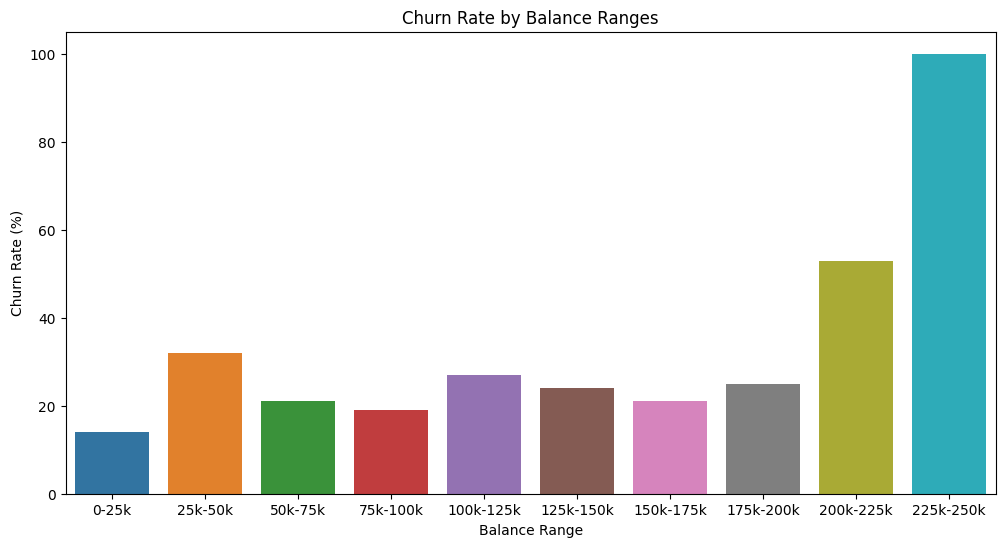

In [23]:
# Create balance ranges
df['Balance_Segment'] = pd.cut(df['Balance'], bins=[-0.1, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000], labels=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k-225k', '225k-250k'])

# Calculate the number of customers by balance range and churn status
balance_abandonment = df.groupby('Balance_Segment')['Exited'].value_counts().unstack().reset_index()
balance_abandonment

balance_abandonment['Churn_Rate'] = (balance_abandonment['Yes'] / (balance_abandonment['Yes'] + balance_abandonment['No']) * 100).round()

print(balance_abandonment)

plt.figure(figsize=(12, 6))
sns.barplot(x='Balance_Segment', y='Churn_Rate', data=balance_abandonment, hue='Balance_Segment')
plt.title('Churn Rate by Balance Ranges')
plt.xlabel('Balance Range')
plt.ylabel('Churn Rate (%)')
plt.show()


**Results**:
- The churn rate is significantly higher in the `200k-225k` range (`53%`), but this is based on a very small sample size.

- The `25k-50k` range shows a churn rate of `32%`, while the `0-25k` range has the lowest churn rate at `14%`.

- The `225k-250k` range contains only 2 customers, making the churn rate calculation in this segment unreliable.

**Revised Conclusions**:
- Given the very small sample size in the `225k-250k` range, it's not reliable to draw meaningful conclusions from this segment. The high churn rate observed could be an anomaly rather than a trend.

- The focus should instead be on segments with more substantial sample sizes, such as the `25k-50k` range, which shows a higher-than-average churn rate and might benefit from targeted retention efforts.

- The low churn rate in the `0-25k` range suggests that these customers are less likely to leave, possibly due to minimal account usage, but this also indicates lower engagement.



## Country Segmentation


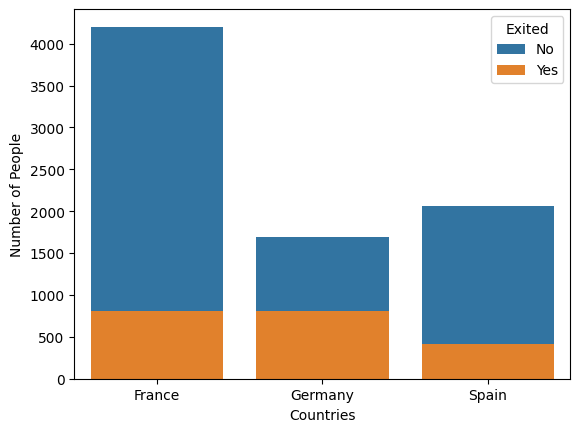

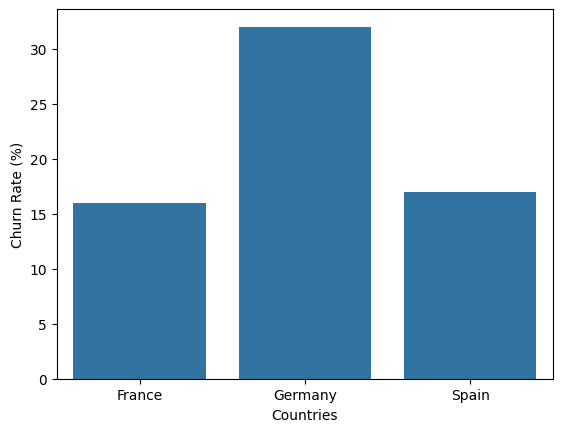

In [24]:
churn_country = df.groupby(df.Geography).Exited.value_counts().unstack().reset_index().rename(columns={0: 'No', 1: 'Yes'})

churn_country['churn_rate'] = ((churn_country.Yes / (churn_country.No + churn_country.Yes)) * 100).round()

sns.barplot(x='Geography', y='No', data=churn_country, label='No')
sns.barplot(x='Geography', y='Yes', data=churn_country, label='Yes')
plt.title('')
plt.ylabel('Number of People')
plt.xlabel('Countries')
plt.legend(title='Exited')
plt.show()

sns.barplot(x='Geography', y='churn_rate', data=churn_country)
plt.ylabel('Churn Rate (%)')
plt.xlabel('Countries')
plt.show()




**Results**:
- The first bar plot shows the distribution of customers across different countries (France, Germany, and Spain).
  - France has the highest number of customers, with a larger proportion of retained customers (No).
  
  - Germany has a higher number of churned customers (Yes) compared to Spain, despite having fewer total customers.

- The second bar plot illustrates the churn rate by country.
  - Germany has the highest churn rate at approximately 32%.
  
  - Spain follows with a churn rate of around 17%.
  
  - France has the lowest churn rate at 16%.

**Conclusions**:
- Customers in Germany are at a higher risk of churning compared to those in France and Spain. This suggests that targeted retention strategies may be needed specifically for the German market.

- The relatively low churn rate in France indicates stronger customer retention, which could be studied further to identify successful strategies that might be applied in other regions.

- The differences in churn rates by geography highlight the importance of regional strategies in customer retention efforts.


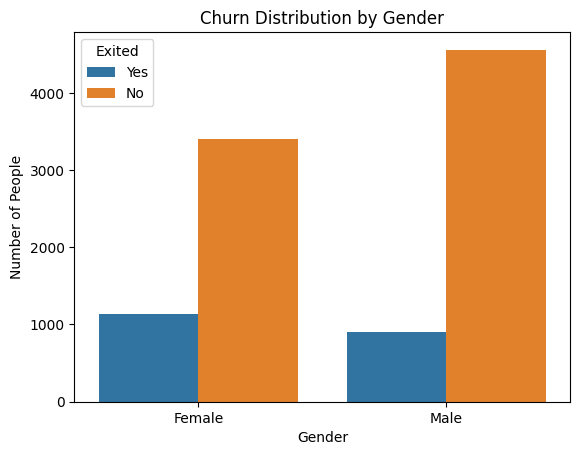

In [25]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Churn Distribution by Gender')
plt.show()


**Results**:
- The count plot shows the distribution of churn by gender.
  
  - A higher number of females have churned compared to males.
  

**Conclusions**:
- Gender appears to have some influence on churn, with females showing a slightly higher churn rate.

- This may indicate the need for gender-specific strategies to address potential factors contributing to churn among female customers.



In [26]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [27]:
churn_gender = df.groupby('Gender')['Exited'].value_counts().unstack().reset_index()
rate = (churn_gender.Yes / (churn_gender.Yes + churn_gender.No) * 100).round(2)
churn_gender.loc[:, 'Rate'] = rate
churn_gender

Exited,Gender,No,Yes,Rate
0,Female,3404,1139,25.07
1,Male,4558,899,16.47


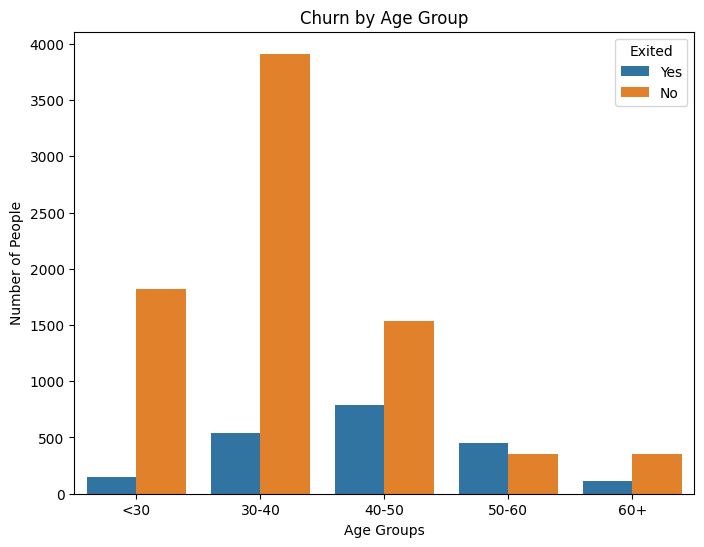

In [28]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
plt.title('Churn by Age Group')
sns.countplot(data=df, x='Age_Group', hue='Exited')
plt.ylabel('Number of People')
plt.xlabel('Age Groups')
plt.show()


**Results**:
- The count plot shows the distribution of churn across different age groups.
  - The `30-40` and `40-50` age groups have the highest number of churned customers.
  
  - The `60+` age group has the lowest number of churned customers, but also fewer customers overall.

**Conclusions**:
- Middle-aged customers (`30-50` years) are more likely to churn compared to other age groups, indicating that this demographic might require more attention in retention strategies.

- The lower churn rate among older customers (`60+`) suggests stronger loyalty or lower engagement, which might be explored further to understand the underlying factors.

- This analysis highlights the importance of considering age as a factor in churn, with tailored strategies potentially needed for different age groups.


In [29]:
churn_age = df.groupby('Age_Group')['Exited'].value_counts().unstack().reset_index()
rate = (churn_age.Yes / (churn_age.Yes + churn_age.No) * 100).round(2)
churn_age.loc[:, 'Rate'] = rate
churn_age


C:\Users\juana\AppData\Local\Temp\ipykernel_16832\3208654057.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_age = df.groupby('Age_Group')['Exited'].value_counts().unstack().reset_index()


Exited,Age_Group,No,Yes,Rate
0,<30,1820,148,7.52
1,30-40,3912,539,12.11
2,40-50,1532,788,33.97
3,50-60,349,448,56.21
4,60+,349,115,24.78


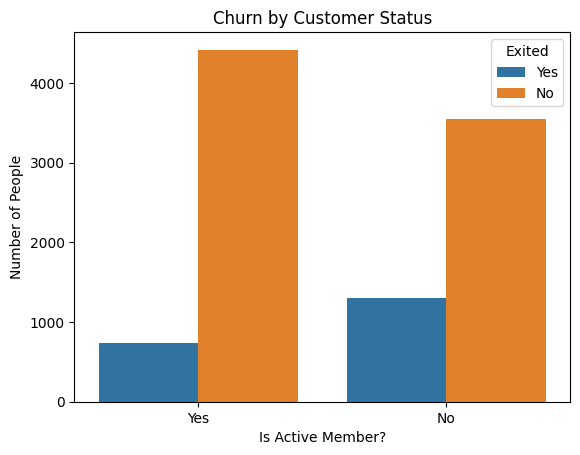

In [30]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Churn by Customer Status')
plt.ylabel('Number of People')
plt.xlabel('Is Active Member?')
plt.show()


**Results**:
- The count plot shows the distribution of churn based on whether customers are active members.
  
  - A significantly higher number of inactive members (IsActiveMember = No) have churned compared to active members.
  
  - Active members (IsActiveMember = Yes) have a much lower churn rate, indicating better retention among this group.

**Conclusions**:
- Being an active member is strongly associated with lower churn rates, suggesting that customer engagement plays a critical role in retention.

- This indicates that efforts to keep customers engaged and active can significantly reduce the likelihood of churn.

- Strategies to convert inactive members into active ones, or to maintain the activity of current active members, could be effective in lowering overall churn rates.


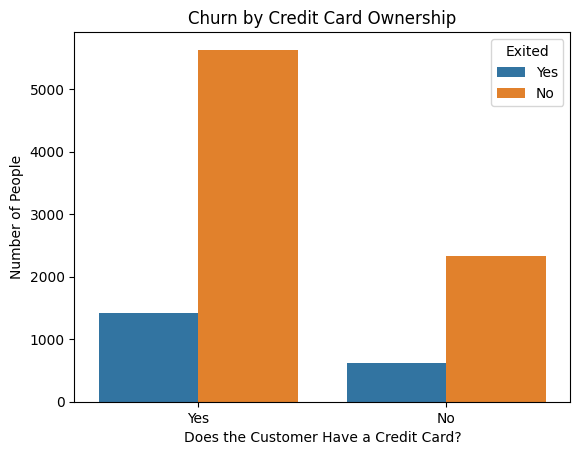

In [31]:
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn by Credit Card Ownership')
plt.xlabel('Does the Customer Have a Credit Card?')
plt.ylabel('Number of People')
plt.show()


**Results**:
- The count plot shows the distribution of churn based on whether customers have a credit card.
  
  - There is no significant difference in the number of churned customers between those who have a credit card and those who do not.
  
  - Both groups show similar patterns in churn distribution.

**Conclusions**:
- Credit card ownership does not appear to have a strong influence on churn rates.

- This suggests that other factors beyond credit card ownership are more critical in determining whether a customer will churn.

- While credit card ownership might be an important factor for other aspects of customer behavior, it does not seem to play a major role in churn in this dataset.


In [32]:
df.to_excel('Customer_Churn_cleaned.xlsx', index=False)